# Modeling - XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,RocCurveDisplay
from imblearn.over_sampling import SMOTE

## Import Datasets

In [2]:
X_train = pd.read_pickle("data/model_input/X_train.pkl")
y_train = pd.read_pickle("data/model_input/y_train.pkl")
X_test = pd.read_pickle("data/model_input/X_test.pkl")
y_test = pd.read_pickle("data/model_input/y_test.pkl")

## Hyperparameter Tuning

In [9]:
clf = XGBClassifier(colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Evaluation

In [10]:
clf.score(X_test, y_test)

0.9173023559497252

In [11]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.7104566323128798

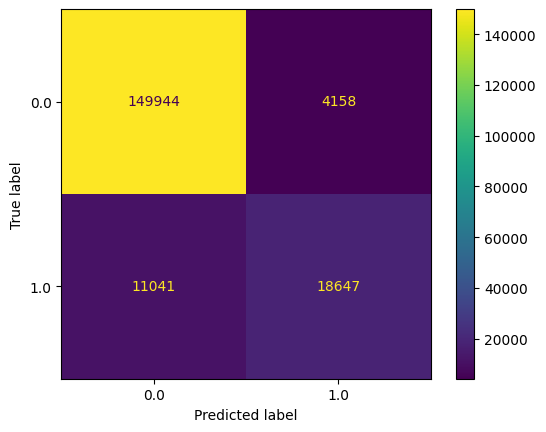

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
plt.show()

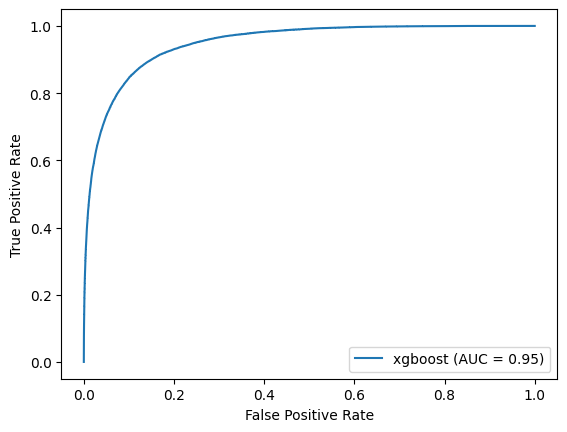

In [13]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='xgboost').plot()
plt.show()

## Save Model

In [14]:
pickle.dump(clf, open("data/models/xgb.sav", 'wb'))